# Lectura de archivos
* Se importan las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Se importan la base de datos bfi.csv y asígnela a un objeto df.
* Se solicitan las primeras 5 observaciones con head.

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Cargamos la base de datos
df = pd.read_csv('bfi.csv')

# Visualizamos las primeras 5 observaciones
print(df.head())

   Unnamed: 0   A1   A2   A3   A4   A5   C1   C2   C3   C4  ...   N4   N5  \
0       61617  2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  ...  2.0  3.0   
1       61618  2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  ...  5.0  5.0   
2       61620  5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  ...  2.0  3.0   
3       61621  4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  ...  4.0  1.0   
4       61622  2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  ...  4.0  3.0   

    O1  O2   O3   O4   O5  gender  education  age  
0  3.0   6  3.0  4.0  3.0       1        NaN   16  
1  4.0   2  4.0  3.0  3.0       2        NaN   18  
2  4.0   2  5.0  5.0  2.0       2        NaN   17  
3  3.0   3  4.0  3.0  5.0       2        NaN   17  
4  3.0   3  4.0  3.0  3.0       1        NaN   17  

[5 rows x 29 columns]


# Preprocesamiento de datos
* Se eliminan las columnas redundantes de la base, tal como 'Unnamed: 0'.
* Se analiza el patrón de datos perdidos con missingno.
* Se genera un nuevo objeto donde almacenará la base sin valores perdidos.

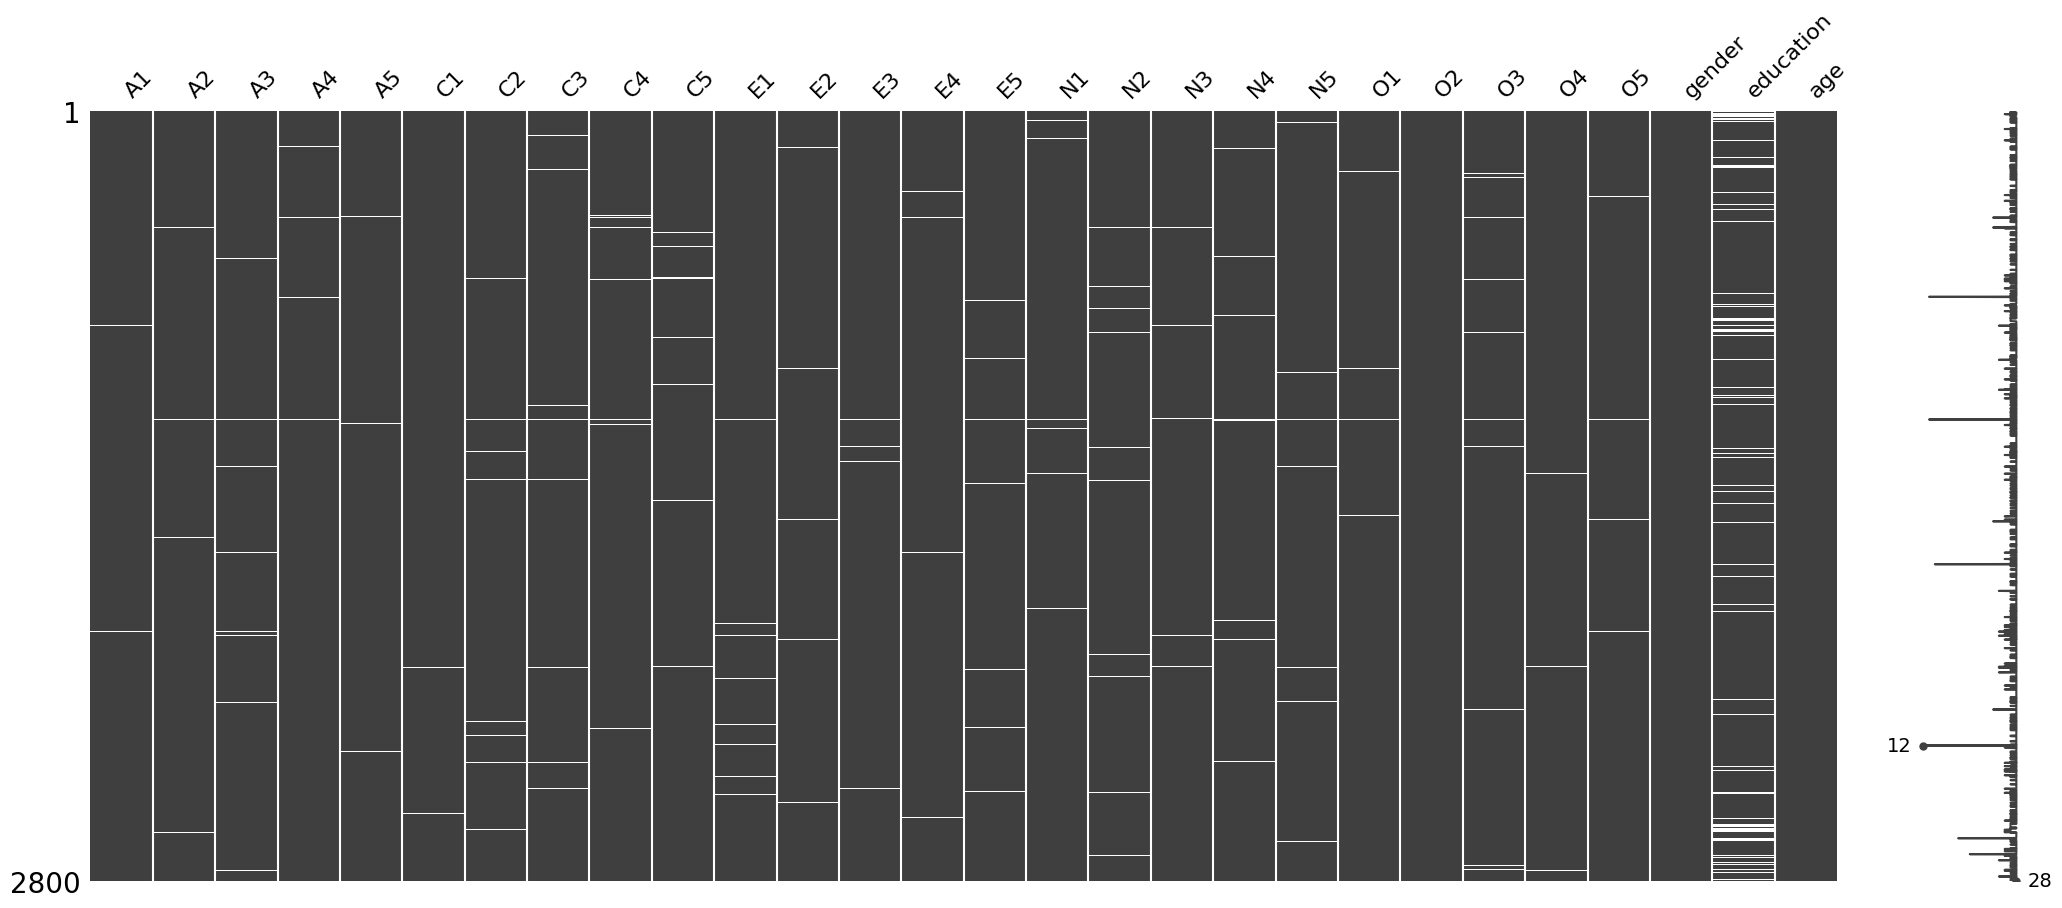

In [2]:
# Eliminamos la columna 'Unnamed: 0'
df = df.drop(columns='Unnamed: 0')

# Visualizamos el patrón de datos perdidos con missingno
msno.matrix(df)

# Creamos un nuevo objeto df_no_missing donde almacenamos la base sin valores perdidos
df_no_missing = df.dropna()

# Descripción
* Se separa en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.


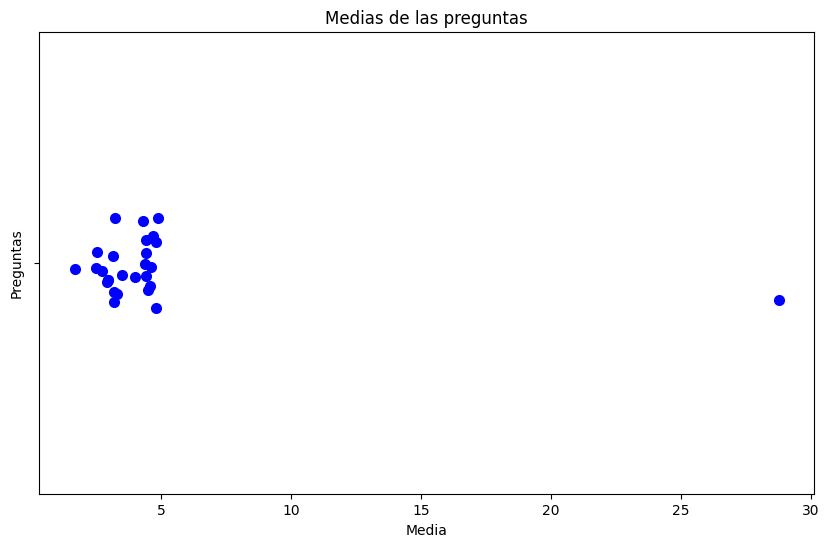

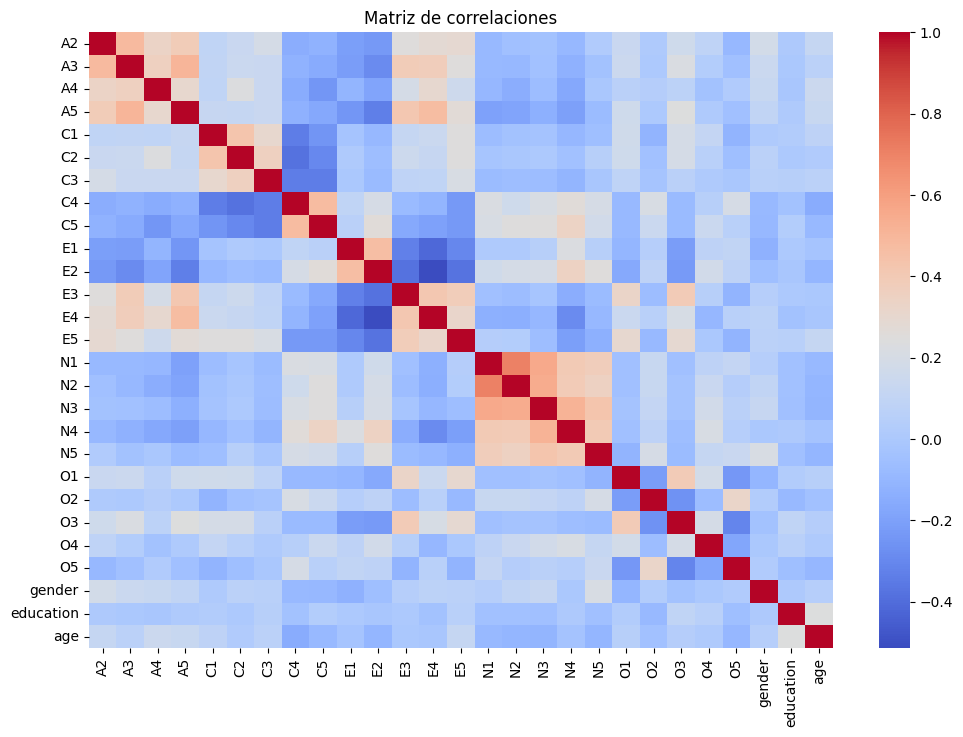

In [5]:
# Separar la batería de preguntas
bateria_preguntas = df.iloc[:, 1:]

# Calcular las medias de las preguntas
medias_preguntas = bateria_preguntas.mean()

# Visualizar las medias en un dotplot
plt.figure(figsize=(10, 6))
sns.stripplot(data=medias_preguntas, orient='h', color='blue', size=8)
plt.title('Medias de las preguntas')
plt.xlabel('Media')
plt.ylabel('Preguntas')
plt.show()

# Generar la matriz de correlaciones
matriz_correlaciones = bateria_preguntas.corr()

# Visualizar la matriz de correlaciones en un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Matriz de correlaciones')
plt.show()


# Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada factor. Comente sobre qué significa cada factor construído.

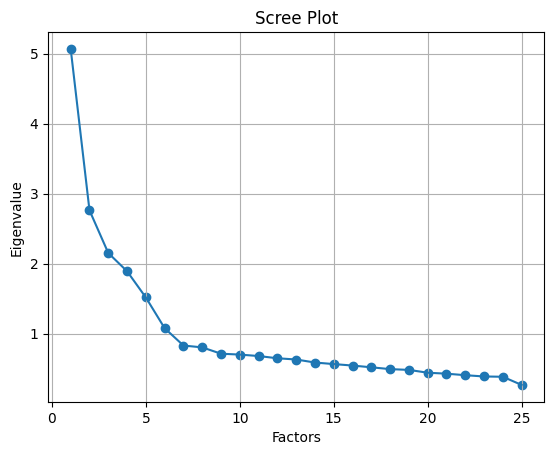

     Factor1   Factor2   Factor3   Factor4   Factor5
A1  0.105915  0.037575  0.034817 -0.419281 -0.090180
A2  0.036656  0.221793  0.136786  0.607552  0.044579
A3  0.013753  0.322666  0.111741  0.638390  0.045098
A4 -0.059559  0.198711  0.223102  0.433899 -0.133771
A5 -0.117891  0.384458  0.086868  0.532139  0.054284
C1  0.017813  0.063871  0.540611  0.032170  0.205165
C2  0.089182  0.022303  0.638851  0.110623  0.102335
C3 -0.034199  0.032465  0.559417  0.108153 -0.006682
C4  0.243565 -0.074349 -0.627098 -0.026737 -0.098906
C5  0.283761 -0.180192 -0.561464 -0.037165  0.040883
E1  0.033872 -0.565706  0.033544 -0.121770 -0.064404
E2  0.238023 -0.683028 -0.097227 -0.109739 -0.046575
E3  0.023335  0.552116  0.092576  0.255990  0.276346
E4 -0.118895  0.640113  0.101938  0.323001 -0.077152
E5  0.038116  0.513081  0.317673  0.091660  0.204395
N1  0.787477  0.081736 -0.041694 -0.208967 -0.081028
N2  0.753036  0.035738 -0.024618 -0.191632 -0.009890
N3  0.733531 -0.062745 -0.057728 -0.017724 -0.

In [4]:
# Instanciamos un objeto FactorAnalyzer donde se estimen 10 dimensiones latentes y no se aplique rotación
fa = FactorAnalyzer(n_factors=10, rotation=None)
fa.fit(question_df)

# Generamos un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables
ev, _ = fa.get_eigenvalues()
plt.scatter(range(1, question_df.shape[1] + 1), ev)
plt.plot(range(1, question_df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Refactorizamos el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot
# Esto debería estar basado en la observación del gráfico scree plot
# Por ejemplo, si observas que 5 factores tienen eigenvalues por encima de 1, puedes instanciar nuevamente FactorAnalyzer con 5 factores
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(question_df)

# Extraemos las cargas λ del modelo e identificamos qué ítems están asociados a cada factor
loadings = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'], index=question_df.columns)
print(loadings)

# Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con kdplot.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

![](img.png)

Coeficientes para Factor1: [ 0.10430625 -0.00880832 -0.0962399 ]
Coeficientes para Factor2: [ 0.08286705 -0.02597531  0.01847925]
Coeficientes para Factor3: [ 0.06890084 -0.00427376  0.06428032]
Coeficientes para Factor4: [0.17195907 0.01151257 0.05997499]
Coeficientes para Factor5: [-0.1022267   0.10005051  0.03075166]


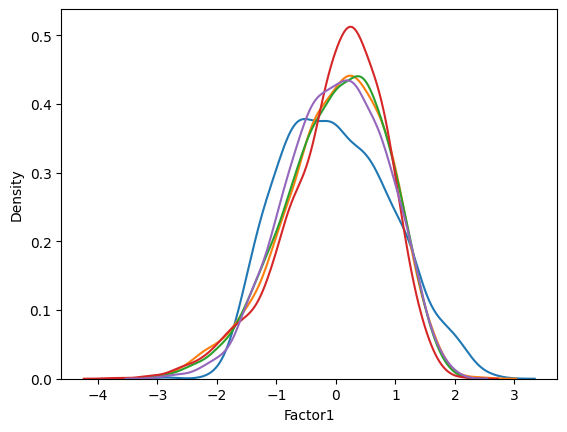

In [6]:
# Extraemos los puntajes del modelo factorial a la base de datos
scores = fa.transform(question_df)
df_scores = pd.DataFrame(scores, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'])

# Graficamos la densidad de cada uno con kdplot
for column in df_scores:
    sns.kdeplot(df_scores[column])

# Modelamos cuáles son los principales determinantes de cada factor
# Suponiendo que las variables 'gender', 'education' y 'age' están en las columnas del dataframe original
X = df_no_missing[['gender', 'education', 'age']]
y = df_scores

# Estandarizamos las variables
sc = StandardScaler()
X = sc.fit_transform(X)

# Ajustamos un modelo de regresión lineal para cada factor
for column in y:
    lr = LinearRegression()
    lr.fit(X, y[column])
    print(f'Coeficientes para {column}: {lr.coef_}')